# NLP

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
review = pd.read_csv('Reviews.csv')
review.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
review.shape

(568454, 10)

In [32]:
review.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
review.duplicated().sum()

0

In [6]:
# NLP Packages 
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')


In [7]:
review.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
len(review.Text[0].split())

48

In [9]:
word_per_review = review.Text.apply(lambda x: len(x.split(' ')))

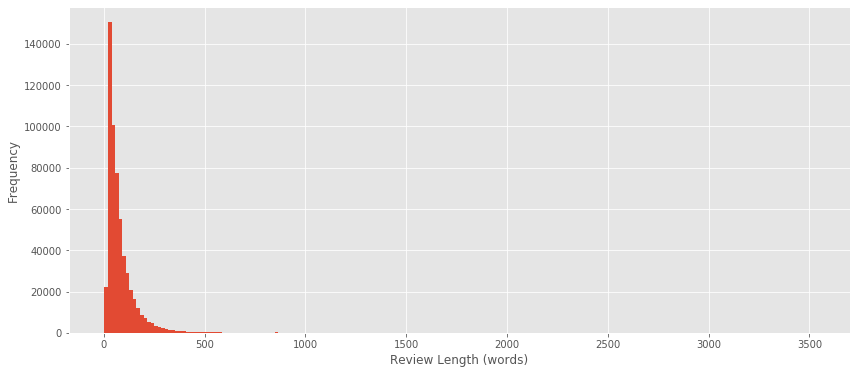

In [10]:
word_per_review.hist(bins = 200 )
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [13]:
print(' Average words:' ,word_per_review.mean())
print('Skewness: ',word_per_review.skew())

 Average words: 82.00552199474363
Skewness:  4.665196605688608


In [14]:
review.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [41]:
percent_val =  100 * review.Score.value_counts()/len(review)
percent_val

5    63.878871
4    14.188483
1     9.194763
3     7.501047
2     5.236835
Name: Score, dtype: float64

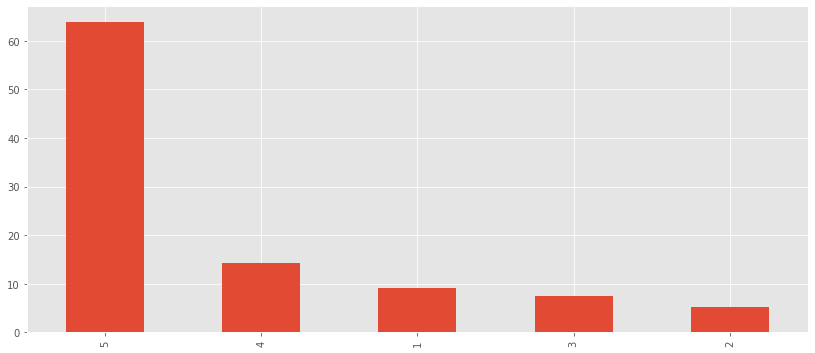

In [42]:
percent_val.plot.bar();

In [43]:
# word cloud 

word_cloud_text = ''.join(review.Text[:500])

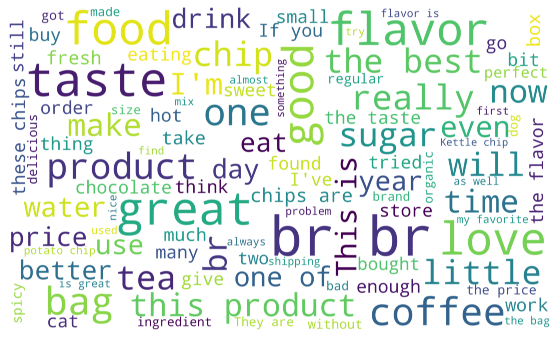

In [45]:
wordcloud = WordCloud(max_font_size= 100,
                      max_words= 100,
                      background_color= "white",
                      scale = 10,
                      width = 1000,
                      height= 600,
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis('off');


In [46]:
# mapping the ratings

review['Sentiment_rating'] = np.where(review.Score > 3,1,0)
## Removing Neutal Reviews

review = review[review.Score != 3]

## Printing the  counts of each class

review['Sentiment_rating'].value_counts()


1    443777
0     82037
Name: Sentiment_rating, dtype: int64

In [47]:
review.shape

(525814, 11)

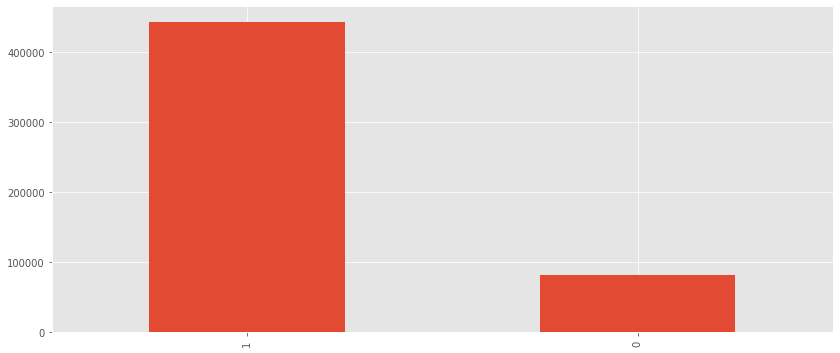

In [48]:
review['Sentiment_rating'].value_counts().plot(kind = 'bar')

# Pre-processing

In [15]:
review.Text[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [16]:
review['reviews_text_lower'] =  review.Text.str.lower()

In [17]:
review.reviews_text_lower[0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.'

In [24]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaero\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk import word_tokenize


In [19]:
# example

s = word_tokenize('Gopi is good boy.')
s

['Gopi', 'is', 'good', 'boy', '.']

In [20]:
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,reviews_text_lower
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price. there was a wid...


In [65]:
review.to_csv('Amazon_reviews.csv')

In [66]:
amazon_reviews = pd.read_csv('Amazon_reviews.csv')

In [67]:
#review=amazon_reviews[:500]

In [68]:
#review['Sentiment_rating'].value_counts().plot(kind = 'bar')

In [1]:
#postive_reviews = amazon_reviews[amazon_reviews.Sentiment_rating == 1]

In [ ]:
#negative_reviews = amazon_reviews[amazon_reviews.Sentiment_rating != 1]

In [ ]:
postive_reviews.to_csv('Postive reviews.csv')
negative_reviews.to_csv('Negative reviews.csv')

In [ ]:
pos = postive_reviews[:20000]
neg = negative_reviews[:20000]

In [ ]:
Merge = pd.concat([pos,neg])

In [ ]:
Merge.Sentiment_rating.value_counts()

In [70]:
# For reviews not converted to lowercase

token_lists = [ word_tokenize(each) for each in Merge.Text]
tokens  =  [item for sub_list in token_lists for item in sub_list]

print("Number of  Unique Tokens then: ", len(set(tokens)))
# For reviews converted  to lower case

token_lists_lower = [ word_tokenize(each) for each in Merge.reviews_text_lower]
tokens_lower  =  [item for sub_list in token_lists_lower for item in sub_list]

print("Number of Unique Tokens now: ", len(set(tokens_lower)))


Number of  Unique Tokens then:  66616
Number of Unique Tokens now:  37370


In [71]:
(66616-54137)/(66616) * 100

18.73273688002882

# Removing Special charcters

In [74]:
### Selecting non alpha numeric charcters that are not spaces
spl_chars = Merge.reviews_text_lower.apply(lambda review:[char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list  into a single list

flat_list = [ item for sub_list in spl_chars for item in sub_list]

#Unique special character
set(flat_list)


set()

In [73]:
l = [[1,2,3], [4,5]]

In [34]:
for i in l:


[1, 2, 3]
[4, 5]


In [45]:
[ item for sub_list in l for item in sub_list ]

[1, 2, 3, 4, 5]

In [75]:
spl_chars

0         []
2         []
4         []
5         []
6         []
          ..
125766    []
125767    []
125769    []
125771    []
125772    []
Name: reviews_text_lower, Length: 40000, dtype: object

In [77]:
## Removing special charcters

review_backup = Merge.reviews_text_lower.copy()
Merge['reviews_text_lower'] = Merge.reviews_text_lower.str.replace(r'[^A-Za-z0-9 ]+',  ' ')

In [79]:
print(" Old review ")
print(review_backup[10])
print("\n New review")
print(Merge.reviews_text_lower[10])

 Old review 
i don t know if it s the cactus or the tequila or just the unique combination of ingredients  but the flavour of this hot sauce makes it one of a kind   we picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away   when we realized that we simply couldn t find it anywhere in our city we were bummed br  br  now  because of the magic of the internet  we have a case of the sauce and are ecstatic because of it br  br  if you love hot sauce i mean really love hot sauce  but don t want a sauce that tastelessly burns your throat  grab a bottle of tequila picante gourmet de inclan   just realize that once you taste it  you will never want to use any other sauce br  br  thank you for the personal  incredible service 

 New review
i don t know if it s the cactus or the tequila or just the unique combination of ingredients  but the flavour of this hot sauce makes it one of a kind   we picked up a bottle once on a trip we were on and br

# Stopwords and high/low frequency words 

In [83]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaero\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [84]:
from nltk.corpus import stopwords

print('Available languages for NLTK')
print(stopwords.fileids())

Available languages for NLTK
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [85]:
#noise_word = []

eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [86]:
len(eng_stop_words)

179

In [92]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopwords = []

sentence = Merge.reviews_text_lower[8]
words = nltk.word_tokenize(sentence)

for word in words:
    
    if word in stop_words:
        stopwords.append(word)
    else:
        without_stop_words.append(word)
        
print('...........................Orginal sentance.................\n',sentence) 
print('\n....Stopwords in words in sentance.....\n',stopwords)
print('\n....Non-Stopwords in words in sentance.....\n',without_stop_words)




...........................Orginal sentance.................
 right now i m mostly just sprouting this so my cats can eat the grass  they love it  i rotate it around with wheatgrass and rye too

....Stopwords in words in sentance.....
 ['now', 'i', 'm', 'just', 'this', 'so', 'my', 'can', 'the', 'they', 'it', 'i', 'it', 'with', 'and', 'too']

....Non-Stopwords in words in sentance.....
 ['right', 'mostly', 'sprouting', 'cats', 'eat', 'grass', 'love', 'rotate', 'around', 'wheatgrass', 'rye']


In [119]:
def stopwords_removal(stop_words,sentence):
    
    return [word  for word in nltk.word_tokenize(sentence) if word not in stop_words]




In [123]:
Merge['review_text_nonstop'] = Merge['reviews_text_lower'].apply(lambda row: stopwords_removal(stop_words,row))

In [133]:
Merge.iloc[:,12:14]

,reviews_text_lower,review_text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
4,great taffy at a great price there was a wid...,"[great, taffy, great, price, wide, assortment,..."
5,i got a wild hair for taffy and ordered this f...,"[got, wild, hair, taffy, ordered, five, pound,..."
6,this saltwater taffy had great flavors and was...,"[saltwater, taffy, great, flavors, soft, chewy..."
...,...,...
125766,i ordered the brooklyn coffee for k cup machin...,"[ordered, brooklyn, coffee, k, cup, machine, u..."
125767,i received this last week and was surprised th...,"[received, last, week, surprised, coffee, grou..."
125769,i ve read all the reviews about how the cups d...,"[read, reviews, cups, work, properly, brew, sl..."
125771,the product cups dont work and makes your brew...,"[product, cups, dont, work, makes, brewery, st..."


In [129]:
Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 125772
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              40000 non-null  int64 
 1   Id                      40000 non-null  int64 
 2   ProductId               40000 non-null  object
 3   UserId                  40000 non-null  object
 4   ProfileName             39997 non-null  object
 5   HelpfulnessNumerator    40000 non-null  int64 
 6   HelpfulnessDenominator  40000 non-null  int64 
 7   Score                   40000 non-null  int64 
 8   Time                    40000 non-null  int64 
 9   Summary                 39995 non-null  object
 10  Text                    40000 non-null  object
 11  Sentiment_rating        40000 non-null  int64 
 12  reviews_text_lower      40000 non-null  object
 13  review_text_nonstop     40000 non-null  object
dtypes: int64(7), object(7)
memory usage: 5.8+ MB


# Building a Model

In [138]:
Merge[['Text','Score','Sentiment_rating']].head(5)

,Text,Score,Sentiment_rating
0,I have bought several of the Vitality canned d...,5,1
2,This is a confection that has been around a fe...,4,1
4,Great taffy at a great price. There was a wid...,5,1
5,I got a wild hair for taffy and ordered this f...,4,1
6,This saltwater taffy had great flavors and was...,5,1


# Bag Of Words

In [151]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

X = vec.fit_transform(Merge['reviews_text_lower'][:13000])
df = pd.DataFrame(X.toarray(),columns= vec.get_feature_names())
df.head()

,00,000,0003,000kwh,002,008,0100,0174,02,03,...,zon,zone,zoo,zotz,zucchini,zuccini,zuke,zukes,zuppa,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
## Creating a python object of the classvectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize,stop_words = stop_words,ngram_range=(1,1))
bow_data = bow_counts.fit_transform(Merge['reviews_text_lower'])

In [155]:
bow_data

<40000x37219 sparse matrix of type '<class 'numpy.int64'>'
	with 1412133 stored elements in Compressed Sparse Row format>

In [156]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow = train_test_split(bow_data,Merge['Sentiment_rating'],
                                                                test_size = 0.2, random_state = 11)

In [160]:
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.50075
0    0.49925
Name: Sentiment_rating, dtype: float64

# Applying Logistic Regression

In [161]:
## Training the model

lr_model_all = LogisticRegression()
lr_model_all.fit(X_train_bow,y_train_bow)

## Predicting the doutput 

test_pred_lr_all  = lr_model_all.predict(X_test_bow)

## Calculating the performace

print('F1 Score: ', f1_score(y_test_bow,test_pred_lr_all))


F1 Score:  0.898647810445354
